# Exercise 1: Boston house price predicion

Goal of the exercise: Get the basics of keras and linear recressions

Steps:
1. Load data
2. Visualise data
4. Define the model
5. Train the model
6. Evaluate
7. Repeat 3-6

## Load Open Source Machine Learning Libraries

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import pylab
pylab.rcParams['figure.figsize'] = [12.0, 8.0]
%matplotlib inline

## Load Keras, one of the most popular Open Source Deep Learning library

In [2]:
# Keras is an easy to use Deep Learning library for Python
import keras

from keras import backend as K

# Load Sequential model architecture
from keras.models import Sequential

# Load Dense and Dropout layers ?
from keras.layers import Dense, Dropout

# Load RMSprop optimizer to minimize cost to train the network
from keras.optimizers import RMSprop

Using TensorFlow backend.


## Loading data

In [3]:
from sklearn.datasets import load_boston

# Load data
boston = load_boston()

# Choose AVG number of rooms as feature
X = boston.data[:, boston.feature_names.tolist().index('RM')]

# Target / desired output
y = boston.target

## Visualising data
It is a good idea to visualise the data before running any machine learning algorithms to see if the data makes any sense and if it is possible to learn from the data.

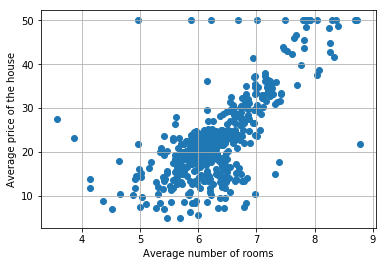

In [4]:
pylab.scatter(X, y)
pylab.grid()
pylab.xlabel('Average number of rooms')
pylab.ylabel('Average price of the house')

#  Linear regression (from SciKit-Learn)

## Train

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(x_train.shape)

(404,)


In [6]:
clf = LinearRegression()

In [7]:
clf.fit(x_train.reshape(-1,1), y_train)

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Evaluate model

In [8]:
train_error = mean_squared_error(y_train, clf.predict(x_train.reshape(-1,1)))
test_error = mean_squared_error(y_test, clf.predict(x_test.reshape(-1,1)))
print('Train error=%f test error=%f' % (train_error, test_error))

Train error=42.336734 test error=49.376589


### Visualise results

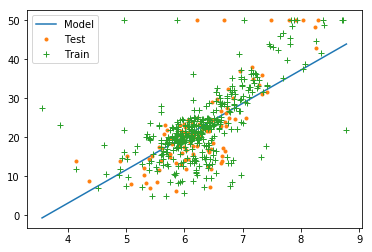

In [9]:
pylab.figure()
xs = np.linspace(X.min(), X.max(), 100)
pylab.plot(xs, clf.predict(xs.reshape(-1, 1)))
pylab.plot(x_test, y_test, '.')
pylab.plot(x_train, y_train, '+')
pylab.legend(['Model', 'Test', 'Train'])

# Linear regression with Keras

## Load data

In [10]:
from sklearn.datasets import load_boston

# Load data
boston = load_boston()

# Choose AVG number of rooms as feature
X = boston.data[:, boston.feature_names.tolist().index('RM')]

# Target / desired output
y = boston.target

print(X.shape)
print(y.shape)

(506,)
(506,)


## Define a model (LinReg)

In [11]:
# It is a good idea to clear the session (remove graphs etc from GPU/CPU) before defining a new model
K.clear_session()

# Init new feedforward network model from keras
model = Sequential()

# In linear regression we don't have hidden layers. Just the output which is connected to input.
model.add(Dense(1, activation='linear', input_shape=(1,)))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## Define loss/cost function and optimizer and compile network

In [12]:
model.compile(loss='mean_squared_error',
              optimizer=RMSprop())

## Train the model

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
history = model.fit(x_train, y_train,
                    batch_size=256,
                    epochs=1000,
                    verbose=0)

## Evaluate the model

In [15]:
train_error = mean_squared_error(y_train, model.predict(x_train, verbose=0))
test_error = mean_squared_error(y_test, model.predict(x_test, verbose=0))
print('Train error=%f test error=%f' % (train_error, test_error))

Train error=169.686555 test error=151.772470


### Visualise results

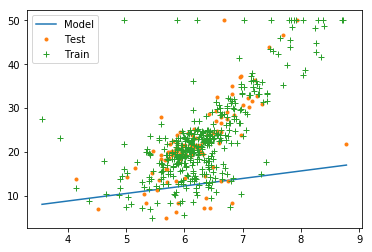

In [16]:
pylab.figure()
pylab.plot(xs, model.predict(xs.reshape(-1, 1)))
pylab.plot(x_test, y_test, '.')
pylab.plot(x_train, y_train, '+')
pylab.legend(['Model', 'Test', 'Train'])

# Neural network

## Load data

In [17]:
from sklearn.datasets import load_boston

# Load data
boston = load_boston()

# Choose AVG number of rooms as feature
X = boston.data

# Target / desired output
y = boston.target

print(X.shape)
print(y.shape)

(506, 13)
(506,)


## Process data

In [18]:
x_scaler = MinMaxScaler().fit(X)
X = x_scaler.transform(X)
y_scaler = MinMaxScaler().fit(y.reshape(-1, 1))
y = y_scaler.transform(y.reshape(-1, 1))

## Define a model

In [19]:
# It is a good idea to clear the session (remove graphs etc from GPU/CPU) before defining a new model
K.clear_session()

# Init new feedforward network model from keras
model = Sequential()

# Input layer connected a layer with 2 nodes
model.add(Dense(2, activation='linear', input_shape=(X.shape[1],)))

model.add(Dense(1, activation='linear', input_shape=(1,)))

model.summary()

model.compile(loss='mean_squared_error',
              optimizer=RMSprop())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 28        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Train a model

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
history = model.fit(x_train, y_train,
                    batch_size=256,
                    epochs=1000,
                    verbose=0)

## Evaluate the model

In [22]:
train_error = mean_squared_error(y_train, model.predict(x_train, verbose=0))
test_error = mean_squared_error(y_test, model.predict(x_test, verbose=0))
print('Train error=%f test error=%f' % (train_error, test_error))

Train error=0.010711 test error=0.011790


### Visualise

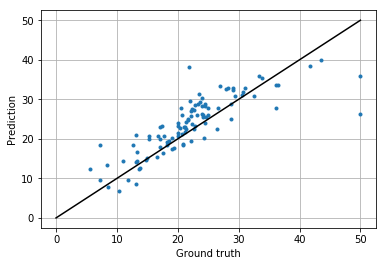

In [23]:
y_test_pred = model.predict(x_test, verbose=0)
pylab.plot(y_scaler.inverse_transform(y_test), y_scaler.inverse_transform(y_test_pred), '.')
pylab.plot([0,50],[0,50],'k-')
pylab.xlabel('Ground truth')
pylab.ylabel('Prediction')
pylab.grid()